# matplotlib 入門 (7) nitta@tsuda.ac.jp

# 7章: 画像の保存・読み込み・表示

「画像ファイルへの保存」

画像データは、tensorflow.keras のデータベースにあるものを利用することにする。
Google Colab では標準で tensorflow が使えるが、手元の jupyter notebook の環境で tensorflow がインストールしてなければ、pip コマンドで導入すること。


In [ ]:
# ! pip install tensorflow

<h3><font color="red"><b>鉄則[7-1]:</b>  Numpy配列形式の画像データを表示するときは、グレースケール画像は[0,255]のuint8型配列に、カラー画像は[0,1]のfloat32型配列に変換してから、Axes.imshow() を適用する。</font></h3>

<ul>
<li><font color="blue">Axes.imshow(X, cmap=None, vmin=None, vmax=None ...)</font></li>
<pre>
    Parameters:
        X: Numpy Array or PIL image
        サポートされている Array の種類
        (M, N) ... グレースケール画像。<code>cmap='gray', vmin=0, vmax=255</code> で呼び出す
        (M, N, 3 or 4) ... カラー画像。要素の範囲が[0.0, 1.0]の'float32'型Numpy配列、または、要素の範囲が[0,255]の'unit8'型Numpy配列
</pre>
</ul>

グレースケール画像(channel数=1)の場合は要素値の範囲が [0, 255] の 'uint8' 型 Numpy 配列に変換してから、カラー画像(channel数=3 or 4)の場合は要素値の範囲が [0, 1] の 'float32' 型 Numpy 配列に変換してから、この関数を適用する。


## 7-1: グレースケールの画像をプロットする (Axes.imshow())

表示できる画像は2次元配列である必要がある。
配列の要素が整数の場合は[0, 255] の範囲で輝度(0:黒, 255: 白)を表す。
配列の要素が浮動小数の場合は[0.0, 1.0]の範囲で輝度(0.0:黒, 1.0: 白)を表す。

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [ ]:
# MNIST (手書き文字)の画像データを用意する

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# 画像データを表す numpy array の要素の型を調べる
type(x_train[0][0][0])

numpy.uint8

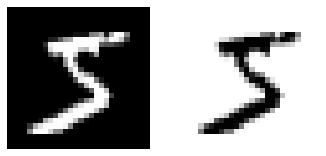

In [ ]:
# sample code 7-1
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

fig, ax = plt.subplots(1, 2, figsize=(2.8 * 2, 2.8))

img1 = x_train[0]
img2 = 255 - img1   # invert image

ax[0].imshow(img1, cmap='gray')
ax[0].axis('off')

ax[1].imshow(img2, cmap='gray')
ax[1].axis('off')

plt.show()

## 7-2: カラー画像を表示する (Axes.imshow())

カラー画像のデータは (Rows, Cols, Channels)形式のテンソル、
または (Channels, Rows, Cols) 形式のテンソルである。
Channels の要素数は 3 でRGB の輝度を表す。

ここで利用する CIFAR10 では (Rows, Cols, Channels) という形式である。

RGBの各要素が整数の場合は[0, 255]の範囲で輝度(0:暗い, 255: 明るい)を表す。
RGBの各要素が浮動小数の場合は[0.0, 1.0]の範囲で輝度(0.0:暗い, 1.0: 明るい)を表す。

In [ ]:
# cifar10 の画像を用意する
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# 画像データを表す numpy array の要素の型を調べる
type(x_train[0][0][0][0])

numpy.uint8

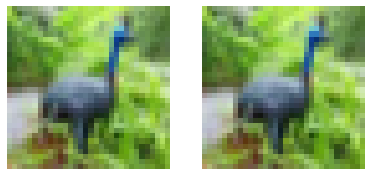

In [ ]:
# sample code 7-2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

fig, ax = plt.subplots(1, 2, figsize=(3.2 * 2, 3.2))

img1 = x_train[6]  # [0, 255]
img2 = img1.astype('float32') / 255. # [0.0, 1.0]

ax[0].imshow(img1)
ax[0].axis('off')

ax[1].imshow(img2)
ax[1].axis('off')

plt.show()

In [ ]:
# 画像データを表す numpy array の要素の型
# Deep Learning で画像を使う場合は [0, 1] または [-1, 1] の範囲の float32 型にしておくと使いやすい。
type(img2[0,0,0])

numpy.float32

## 7-3 の準備: 画像ファイルをネットワークからダウンロードして展開する

7-3 の準備として、VidTIMIT datasetの顔画像ファイル(の一部)をネットワークからダウンロードして展開する。


Official WWW of VidTIMIT dataset: <br />
<a href="http://conradsanderson.id.au/vidtimit/"> 
http://conradsanderson.id.au/vidtimit/
</a> <br />

zip files of 2 persons of VidTIMIT dataset: <br />
<a href="https://zenodo.org/record/158963/files/fadg0.zip">
https://zenodo.org/record/158963/files/fadg0.zip
</a><br />
<a href="https://zenodo.org/record/158963/files/faks0.zip">
https://zenodo.org/record/158963/files/faks0.zip
</a> <br />

In [ ]:
# 指定したURLからデータを指定した場所にダウンロードする
import os
import urllib.request

url = 'https://zenodo.org/record/158963/files/fadg0.zip'
filepath = 'data/fadg0.zip'

dpath, fname = os.path.split(filepath)
os.makedirs(dpath, exist_ok=True)
urllib.request.urlretrieve(url, filepath)

('data/fadg0.zip', <http.client.HTTPMessage at 0x7f0a1626e250>)

In [ ]:
# ファイルを確認する。
if os.name == 'nt':
    LS = 'dir'
    LS_R = 'dir /s'
else:
    LS = 'ls -l'
    LS_R = 'ls -lR'

!{LS} data

total 79684
-rw-r--r-- 1 root root 81593138 Mar 28 13:43 fadg0.zip


In [ ]:
# zipファイルを指定したフォルダに展開する
import zipfile

with zipfile.ZipFile(filepath, 'r') as f:
    f.extractall(dpath)

In [ ]:
! {LS} data

total 79688
drwxr-xr-x 4 root root     4096 Mar 28 13:43 fadg0
-rw-r--r-- 1 root root 81593138 Mar 28 13:43 fadg0.zip


In [ ]:
! {LS} data/fadg0

total 8
drwxr-xr-x  2 root root 4096 Mar 28 13:43 audio
drwxr-xr-x 15 root root 4096 Mar 28 13:43 video


In [ ]:
! {LS} data/fadg0/video

total 84
drwxr-xr-x 2 root root 12288 Mar 28 13:43 head
drwxr-xr-x 2 root root 12288 Mar 28 13:43 head2
drwxr-xr-x 2 root root 20480 Mar 28 13:43 head3
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sa1
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sa2
drwxr-xr-x 2 root root  4096 Mar 28 13:43 si1279
drwxr-xr-x 2 root root  4096 Mar 28 13:43 si1909
drwxr-xr-x 2 root root  4096 Mar 28 13:43 si649
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx109
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx19
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx199
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx289
drwxr-xr-x 2 root root  4096 Mar 28 13:43 sx379


## 7-3: ファイルから画像の読み込み


画像ファイルが次の場所にあるものとする。

./data/fadg0/video/head/[0-9]*

<h3><font color="red"><b>鉄則[7-2]:</b>  画像ファイルから画像データを読み込む時は tensorflow.keras の下にある load_img() 関数を使う。</font></h3>

tensorflow.keras の load_img() / img_to_array() / array_to_img() / save_img() 関数は
<ul>
<li>tensorflow.keras.utils</li>
<li>tensorflow.keras.preprocessing.image</li>
</ul>
のどちらか(tensorflowのバージョンで異なる)にある。

<ul>
<li><font color="blue">load_img(path, grayscale=false, color_mode='rgb', target_size=None, interpolation='nearest')</font> ... 指定されたpathから画像ファイルを読み込み、PIL形式のデータとして返す。</li>
</ul>

load_img() 関数の返り値は PIL形式の画像データなので、Numpy の配列に変換しておいた方が後々使いやすい。

<pre>
    image_pil = load_img(path)
</pre>

<h3><font color="red"><b>鉄則[7-3]:</b>  load_img() で読み込んだ画像データは PIL形式なので、ただちに Numpy Array に変換する。</font></h3>

tensorflow.keras の load_img() / img_to_array() / array_to_img() / save_img() 関数は
<ul>
<li>tensorflow.keras.utils</li>
<li>tensorflow.keras.preprocessing.image</li>
</ul>
のどちらか(tensorflowのバージョンで異なる)にある。

load_img() 関数の返り値は PIL形式の画像データなので、Numpyの配列に変換した方が後々使いやすい。
この変換は、img_to_array()関数を使ってもよいが、numpy.array()関数の方がよく利用されているようだ。

<ul>
<li><font color="blue">img_to_array(img, data_format=None, dtype=None)</font> ... PIL 形式の画像データを Numpy の配列に変換する。</li>
<li><font color="blue">numpy.array(object, dtype=None, ...)</font></li>
</ul>

img_to_array() 関数は、
各要素の範囲が[0, 255]の 'uint8' 型 Numpy 配列を返す。
PIL形式のデータに dtype パラメータの指定なしで np.array() を適用した場合も 'uint8' 型 Numpy 配列を返す。

<pre>
    image_uint8 = np.array(imgage_pil)
</pre>


<h3><font color="red"><b>鉄則[7-4]:</b>  画像データをニューラルネットワークに通すときは、要素値の範囲が [0, 1] または [-1, 1] の 'float32' 型の Numpy 配列に変換する。</font></h3>


要素値の範囲が [0, 255] で型が 'uint8' の Numpy 配列を、要素値の範囲が[0, 1] または [-1, 1] で型が 'float32' の Numpy 配列に変換するには次のコードを使う。
<pre>
  image = image_uint8.astype('float32') / 255.   # [0, 255] --> [0, 1]
or
  image = image_uint8.astype('float32') / 127.5 - 127.5  # [0, 255] --> [-1, 1]
</pre>

ちなみに、逆変換のコードは次の通り。

<pre>
    image_uint8 = (image * 255).astype('uint8')   # [0, 1] ---> [0, 255]
または
    image_uint8 = ((image + 1) * 127.5).astype('uint8') # [-1, 1] --> [0, 255]
</pre>

In [ ]:
# 画像ファイルのpathを一度に取得する
import os
import glob

DATA_DIR = './data/fadg0/video/head'

In [ ]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text)]

In [ ]:
# glob.glob を使って、ファイルの名前順で読み込む。key引数を指定して数字対応した。
DATA_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, '*')), key=natural_keys)

print(len(DATA_PATHS))
print(DATA_PATHS[0])

346
./data/fadg0/video/head/001


In [ ]:
# sample code 7-3
# 画像ファイルの読み込みと numpy array への変換

import numpy as np
import tensorflow as tf

image_uint8 = np.array(tf.keras.preprocessing.image.load_img(DATA_PATHS[0]))
image = image_uint8.astype('float32') / 255.0

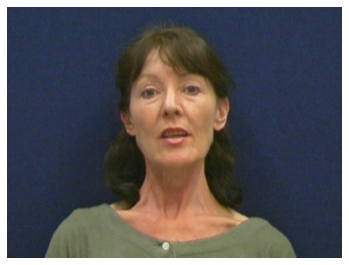

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.imshow(image)
ax.axis('off')

plt.show()

<h3><font color="red"><b>鉄則[7-5]:</b>  Numpy配列形式のカラー画像データを表示したり保存したりするときは、要素値の範囲が[0, 1] の'float32'型Numpy配列に変換する。</font></h3>

要素値の範囲が [0, 1] で型が 'float32' の Numpy 配列と、要素値の範囲が[-1, 1] で型が 'float32' の Numpy 配列を相互に変換するには次のコードを使う。

<pre>
    image = image * 2 - 1      # [0, 1] ---> [-1, 1]
    image = (image + 1) / 2    # [-1, 1] --> [0, 1]
</pre>

要素値の範囲を保証するには numpy.clip() 関数を使う。

<ul>
<li><font color="blue">numpy.clip(a, a_min, a_max, ...)</font></li>
<pre>
    Parameters:
        a: array
        a_min: a_min より小さい値を a_min にする
        a_max: a_max より大きい値を a_max にする
    Returns:
        clipped_array: 要素値の範囲が [a_min, a_max] である配列
</pre>
</ul>

<pre>
    image = np.clip(image, 0, 1)    # [0, 1] を保証する
</pre>

## 7-4: 画像データの要素値の範囲の変換



In [ ]:
# sample code 7-4
# [0, 1] --> [-1, 1]
imageMP = image * 2 - 1

# [-1, 1] --> [0, 1]
image2 = np.clip((imageMP + 1) * 0.5, 0.0, 1.0)

<h3><font color="red"><b>鉄則[7-6]:</b>  Numpy 配列形式の画像データをファイルに保存するときは tensorflow.keras の下にある save_img() 関数を使う。</font></h3>

tensorflow.keras の load_img() / img_to_array() / array_to_img() / save_img() 関数は
<ul>
<li>tensorflow.keras.utils</li>
<li>tensorflow.keras.preprocessing.image</li>
</ul>
のどちらか(tensorflowのバージョンで異なる)にある。

<ul>
<li><font color="blue">save_img(path, x, ...)</font> ... Numpy 配列形式の画像データを、path で指定されたファイルに保存する。</li>
</ul>

保存される画像ファイルのフォーマットは、file_format パラメータで指定できるが、省略された場合はファイル名の拡張子から決定される。

<pre>
    image_pil = load_img(path)
</pre>

## 7-5 画像の保存

画像データは、要素値の範囲が [0, 1] または [-1, 1] の 'float32'型 Numpy 配列として扱う。
要素の範囲が[-1, 1] の場合は、画像を表示や保存するときは一旦 [0, 1] の範囲に変換する必要がある。

保存する場合は,tensorflow.keras の下のsave_img()関数を使う。

<ul>
<li>save_img(path, image, data_format=None, file_format=None, scale=True) ... Numpy配列の画像データ image を、指定されたパス path に保存する。</li>
</ul>

In [ ]:
# sample code 7-5
import tensorflow as tf

save_path = 'data/new_image.jpg'
tf.keras.preprocessing.image.save_img(save_path, image)

! {LS} {save_path}


-rw-r--r-- 1 root root 14875 Mar 28 13:43 data/new_image.jpg
